In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [166]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [167]:
df['sqft_lot'].describe()

count     17206.000000
mean       9860.708648
std       11532.272734
min         520.000000
25%        5000.000000
50%        7344.000000
75%        9886.000000
max      137214.000000
Name: sqft_lot, dtype: float64

In [168]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [169]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [170]:
df.reset_index(drop=True,inplace=True)

In [171]:
df.drop(all_indices,axis=0,inplace= True)

In [172]:
df.reset_index(drop=True,inplace=True)

In [173]:
df['sqft_lot'].describe()

count    16290.000000
mean      8421.280540
std       6486.635185
min        520.000000
25%       4920.000000
50%       7234.500000
75%       9627.750000
max      44431.000000
Name: sqft_lot, dtype: float64

In [174]:
df['sqft_lot'].mean()+3*df['sqft_lot'].std()

27881.18609448078

In [175]:
df = df.loc[df['sqft_lot']<7250]

In [176]:
df['condition'].value_counts()

3    5914
4    1555
5     653
2      51
1       5
Name: condition, dtype: int64

In [177]:
df['cond3'] = df.condition.apply(lambda x: 1 if x ==3 else 0)
df['cond4'] = df.condition.apply(lambda x: 1 if x ==4 else 0)
df['cond5'] = df.condition.apply(lambda x: 1 if x ==5 else 0)

In [178]:
df['price']

0        538000.0
2        604000.0
4        257500.0
7        323000.0
8        468000.0
           ...   
16285    475000.0
16286    360000.0
16287    400000.0
16288    402101.0
16289    325000.0
Name: price, Length: 8178, dtype: float64

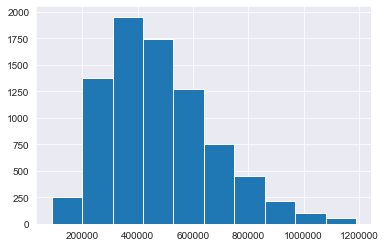

In [179]:
df['price'].hist()

In [180]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

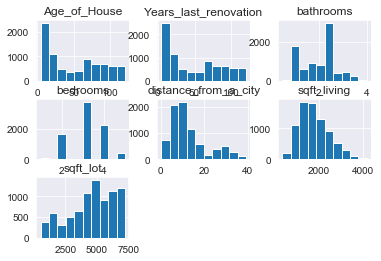

In [181]:
df[features].hist();

In [182]:
df.shape

(8178, 22)

In [183]:
tobox =['sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

In [184]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])


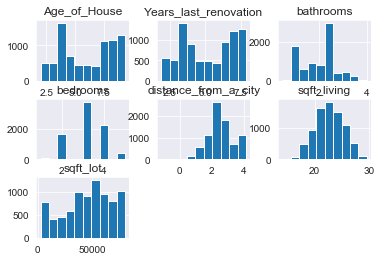

In [185]:
df[features].hist();

In [186]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [187]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House','grade',
           'Years_last_renovation']


In [188]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [189]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [190]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'cond3',
       'cond4', 'cond5'],
      dtype='object')

In [191]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'Age_of_House','basement','grade']
outcome = ['price']

In [192]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'basement','grade']
outcome = ['price']

In [193]:
df['bedbath']=df['bedrooms']*df['bathrooms']

In [194]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'basement', 'grade','biggerliving','biggerlot','bedbath']
outcome = ['price']

In [150]:
X = df[x_cols]
y = df['price']

In [151]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              1606.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:43:05   Log-Likelihood:                     -1.1447e+05
No. Observations:                8178   AIC:                                  2.290e+05
Df Residuals:                    8167   BIC:                                  2.290e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               6009.6247   4547.396      1.322      0.186   -2904.429    1.49e+04
bathrooms             -3.455e+04   5545.682     -6.230      0.000   -4.54e+04   -2.37e+04
sqft_living           -5.647e+04   6575.736     -8.588      0.000   -6.94e+04   -4.36e+04
sqft_lot               3407.4164   4325.931      0.788      0.431   -5072.508    1.19e+04
distance_from_a_city  -2.305e+04   4191.231     -5.501      0.000   -3.13e+04   -1.48e+04
Years_last_renovation -1366.0694   5123.904     -0.267      0.790   -1.14e+04    8678.086
basement               2.744e+05   6748.640     40.655      0.000    2.61e+05    2.88e+05
grade                  1.361e+05   4901.431     27.777      0.000    1.27e+05    1.46e+05
biggerliving           3.054e+05   6907.117     44.219      0.000    2.92e+05    3.19e+05
biggerlot              2.122e+05   7158.387     29.637      0.000    1.98e+05    2.26e+05
bedbath                9.458e+04   3026.508     31.250      0.000    8.86e+04    1.01e+05
==============================================================================
Omnibus:                       12.580   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.471
Skew:                          -0.085   Prob(JB):                      0.00196
Kurtosis:                       2.911   Cond. No.                         4.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

11 8
['bathrooms', 'sqft_living', 'distance_from_a_city', 'basement', 'grade']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,6009.6247,4547.396,1.322,0.186,-2904.429,1.49e+04
bathrooms,-3.455e+04,5545.682,-6.230,0.000,-4.54e+04,-2.37e+04
sqft_living,-5.647e+04,6575.736,-8.588,0.000,-6.94e+04,-4.36e+04
sqft_lot,3407.4164,4325.931,0.788,0.431,-5072.508,1.19e+04
distance_from_a_city,-2.305e+04,4191.231,-5.501,0.000,-3.13e+04,-1.48e+04


In [153]:
X = df[x_cols]
y= df['price']

In [154]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              2208.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:43:09   Log-Likelihood:                     -1.1447e+05
No. Observations:                8178   AIC:                                  2.290e+05
Df Residuals:                    8170   BIC:                                  2.290e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathrooms            -3.479e+04   4713.270     -7.381      0.000    -4.4e+04   -2.55e+04
sqft_living          -5.041e+04   5317.070     -9.481      0.000   -6.08e+04      -4e+04
distance_from_a_city -2.154e+04   3529.875     -6.104      0.000   -2.85e+04   -1.46e+04
basement              2.734e+05   6668.436     40.998      0.000     2.6e+05    2.86e+05
grade                 1.349e+05   4455.246     30.268      0.000    1.26e+05    1.44e+05
biggerliving          3.056e+05   6877.928     44.426      0.000    2.92e+05    3.19e+05
biggerlot             2.128e+05   7091.739     30.002      0.000    1.99e+05    2.27e+05
bedbath               9.472e+04   2984.027     31.742      0.000    8.89e+04    1.01e+05
==============================================================================
Omnibus:                       12.125   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.016
Skew:                          -0.083   Prob(JB):                      0.00246
Kurtosis:                       2.912   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bathrooms', 2.152712130695366),
 ('sqft_living', 2.739592395759),
 ('distance_from_a_city', 1.2074245192098372),
 ('basement', 1.6194134024695996),
 ('grade', 1.9234666776210716),
 ('biggerliving', 1.9262630802631067),
 ('biggerlot', 1.2039378658397335),
 ('bedbath', 1.1304871692252134)]

In [156]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

8 8


In [157]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              2208.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:43:11   Log-Likelihood:                     -1.1447e+05
No. Observations:                8178   AIC:                                  2.290e+05
Df Residuals:                    8170   BIC:                                  2.290e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathrooms            -3.479e+04   4713.270     -7.381      0.000    -4.4e+04   -2.55e+04
sqft_living          -5.041e+04   5317.070     -9.481      0.000   -6.08e+04      -4e+04
distance_from_a_city -2.154e+04   3529.875     -6.104      0.000   -2.85e+04   -1.46e+04
basement              2.734e+05   6668.436     40.998      0.000     2.6e+05    2.86e+05
grade                 1.349e+05   4455.246     30.268      0.000    1.26e+05    1.44e+05
biggerliving          3.056e+05   6877.928     44.426      0.000    2.92e+05    3.19e+05
biggerlot             2.128e+05   7091.739     30.002      0.000    1.99e+05    2.27e+05
bedbath               9.472e+04   2984.027     31.742      0.000    8.89e+04    1.01e+05
==============================================================================
Omnibus:                       12.125   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.016
Skew:                          -0.083   Prob(JB):                      0.00246
Kurtosis:                       2.912   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              2208.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:43:12   Log-Likelihood:                     -1.1447e+05
No. Observations:                8178   AIC:                                  2.290e+05
Df Residuals:                    8170   BIC:                                  2.290e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathrooms            -3.479e+04   4713.270     -7.381      0.000    -4.4e+04   -2.55e+04
sqft_living          -5.041e+04   5317.070     -9.481      0.000   -6.08e+04      -4e+04
distance_from_a_city -2.154e+04   3529.875     -6.104      0.000   -2.85e+04   -1.46e+04
basement              2.734e+05   6668.436     40.998      0.000     2.6e+05    2.86e+05
grade                 1.349e+05   4455.246     30.268      0.000    1.26e+05    1.44e+05
biggerliving          3.056e+05   6877.928     44.426      0.000    2.92e+05    3.19e+05
biggerlot             2.128e+05   7091.739     30.002      0.000    1.99e+05    2.27e+05
bedbath               9.472e+04   2984.027     31.742      0.000    8.89e+04    1.01e+05
==============================================================================
Omnibus:                       12.125   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.016
Skew:                          -0.083   Prob(JB):                      0.00246
Kurtosis:                       2.912   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

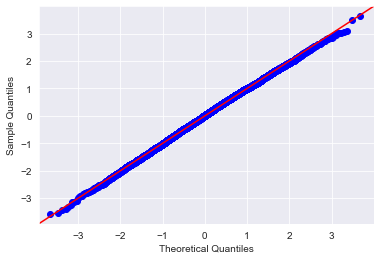

In [159]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


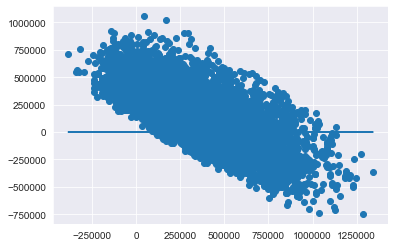

In [160]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

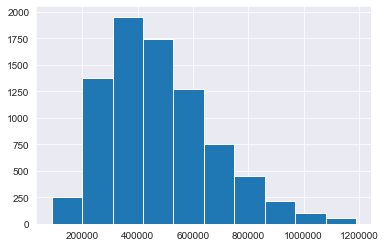

In [161]:
df.price.hist()

In [162]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 634980.0
0.81 percentile: 642601.7000000003
0.82 percentile: 650000.0
0.83 percentile: 660000.0
0.84 percentile: 672339.9999999998
0.85 percentile: 680000.0
0.86 percentile: 697220.0000000002
0.87 percentile: 707998.9999999999
0.88 percentile: 720127.92
0.89 percentile: 735000.0
0.9 percentile: 750000.0
0.91 percentile: 767267.5000000001
0.92 percentile: 780000.0
0.93 percentile: 800000.0
0.94 percentile: 825000.0
0.95 percentile: 850000.0
0.96 percentile: 879874.0000000001
0.97 percentile: 920000.0
0.98 percentile: 968420.0
0.99 percentile: 1042299.9999999956


In [163]:
orig_tot = len(df)
df = df[df.price < 950000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.024455857177794083


In [164]:
X = df[x_cols]
y = df['price']

In [165]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.670
Model:                            OLS   Adj. R-squared (uncentered):              0.670
Method:                 Least Squares   F-statistic:                              2023.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:43:26   Log-Likelihood:                     -1.1153e+05
No. Observations:                7978   AIC:                                  2.231e+05
Df Residuals:                    7970   BIC:                                  2.231e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathrooms             -3.08e+04   4707.051     -6.544      0.000      -4e+04   -2.16e+04
sqft_living          -5.907e+04   5285.258    -11.176      0.000   -6.94e+04   -4.87e+04
distance_from_a_city -1.234e+04   3519.515     -3.506      0.000   -1.92e+04   -5438.598
basement              2.684e+05   6635.790     40.454      0.000    2.55e+05    2.81e+05
grade                 1.253e+05   4481.694     27.953      0.000    1.16e+05    1.34e+05
biggerliving          3.032e+05   6830.880     44.379      0.000     2.9e+05    3.17e+05
biggerlot             2.121e+05   7055.827     30.064      0.000    1.98e+05    2.26e+05
bedbath               9.089e+04   3027.046     30.024      0.000     8.5e+04    9.68e+04
==============================================================================
Omnibus:                       11.499   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.158
Skew:                          -0.073   Prob(JB):                      0.00378
Kurtosis:                       2.888   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

12 12
['bedrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city', 'Years_last_renovation']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.324e+04,1679.028,-7.888,0.000,-1.65e+04,-9953.073
sqft_living,9.98e+04,2380.364,41.925,0.000,9.51e+04,1.04e+05
sqft_lot,4342.8285,1570.699,2.765,0.006,1263.844,7421.813
distance_from_a_city,-8.741e+04,1602.240,-54.557,0.000,-9.06e+04,-8.43e+04
Years_last_renovation,3.037e+04,1962.370,15.478,0.000,2.65e+04,3.42e+04


In [90]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:41:06   Log-Likelihood:            -1.0295e+05
No. Observations:                7922   AIC:                         2.059e+05
Df Residuals:                    7910   BIC:                         2.060e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.324e+04   1679.028     -7.888      0.000   -1.65e+04   -9953.073
sqft_living             9.98e+04   2380.364     41.925      0.000    9.51e+04    1.04e+05
sqft_lot               4342.8285   1570.699      2.765      0.006    1263.844    7421.813
distance_from_a_city  -8.741e+04   1602.240    -54.557      0.000   -9.06e+04   -8.43e+04
Years_last_renovation  3.037e+04   1962.370     15.478      0.000    2.65e+04    3.42e+04
basement              -1.811e+04   2815.104     -6.432      0.000   -2.36e+04   -1.26e+04
cond3                  4.767e+05   2182.192    218.436      0.000    4.72e+05    4.81e+05
grade                  5.975e+04   1874.840     31.870      0.000    5.61e+04    6.34e+04
biggerliving           -2.08e+04   2962.960     -7.022      0.000   -2.66e+04    -1.5e+04
biggerlot              9211.4160   2822.433      3.264      0.001    3678.702    1.47e+04
cond4                  4.977e+05   3511.503    141.747      0.000    4.91e+05    5.05e+05
cond5                  5.295e+05   4926.872    107.469      0.000     5.2e+05    5.39e+05
==============================================================================
Omnibus:                       89.455   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.495
Skew:                           0.209   Prob(JB):                     5.54e-23
Kurtosis:                       3.368   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.9458969796133978),
 ('sqft_living', 3.8133045502785783),
 ('sqft_lot', 1.7416016493277295),
 ('distance_from_a_city', 1.7781394891563544),
 ('Years_last_renovation', 2.657588770929561),
 ('basement', 1.2866129205838959),
 ('cond3', 2.42305566861862),
 ('grade', 2.305396704704414),
 ('biggerliving', 1.4829205564109091),
 ('biggerlot', 1.029653370415999),
 ('cond4', 1.643133474448146),
 ('cond5', 1.3280275720790204)]

In [92]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

12 12


In [93]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:41:09   Log-Likelihood:            -1.0295e+05
No. Observations:                7922   AIC:                         2.059e+05
Df Residuals:                    7910   BIC:                         2.060e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.324e+04   1679.028     -7.888      0.000   -1.65e+04   -9953.073
sqft_living             9.98e+04   2380.364     41.925      0.000    9.51e+04    1.04e+05
sqft_lot               4342.8285   1570.699      2.765      0.006    1263.844    7421.813
distance_from_a_city  -8.741e+04   1602.240    -54.557      0.000   -9.06e+04   -8.43e+04
Years_last_renovation  3.037e+04   1962.370     15.478      0.000    2.65e+04    3.42e+04
basement              -1.811e+04   2815.104     -6.432      0.000   -2.36e+04   -1.26e+04
cond3                  4.767e+05   2182.192    218.436      0.000    4.72e+05    4.81e+05
grade                  5.975e+04   1874.840     31.870      0.000    5.61e+04    6.34e+04
biggerliving           -2.08e+04   2962.960     -7.022      0.000   -2.66e+04    -1.5e+04
biggerlot              9211.4160   2822.433      3.264      0.001    3678.702    1.47e+04
cond4                  4.977e+05   3511.503    141.747      0.000    4.91e+05    5.05e+05
cond5                  5.295e+05   4926.872    107.469      0.000     5.2e+05    5.39e+05
==============================================================================
Omnibus:                       89.455   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.495
Skew:                           0.209   Prob(JB):                     5.54e-23
Kurtosis:                       3.368   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

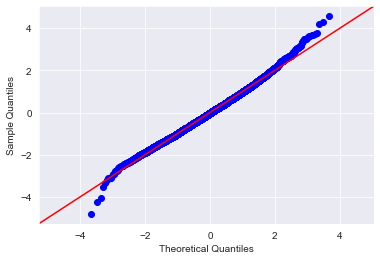

In [94]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


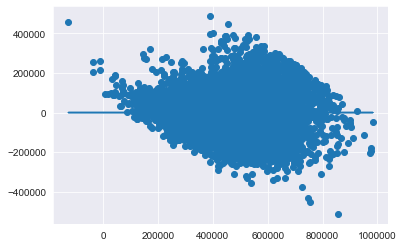

In [95]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 585000.0
0.81 percentile: 595000.0
0.82 percentile: 600000.0
0.83 percentile: 610000.0
0.84 percentile: 620000.0
0.85 percentile: 629000.0
0.86 percentile: 639460.0000000001
0.87 percentile: 650000.0
0.88 percentile: 658500.0
0.89 percentile: 670000.0
0.9 percentile: 680000.0
0.91 percentile: 695000.0
0.92 percentile: 705000.0
0.93 percentile: 719000.0
0.94 percentile: 732451.9999999998
0.95 percentile: 749950.0
0.96 percentile: 760000.0
0.97 percentile: 780000.0
0.98 percentile: 799972.4
0.99 percentile: 820000.0


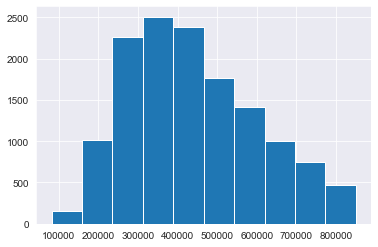

In [339]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [340]:
df = df[df.price <= 780000.0]


In [341]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2175.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:16:24   Log-Likelihood:            -1.7121e+05
No. Observations:               13336   AIC:                         3.424e+05
Df Residuals:                   13324   BIC:                         3.425e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.222e+04   1054.844    -11.581      0.000   -1.43e+04   -1.01e+04
bathrooms              5638.1541   1327.377      4.248      0.000    3036.306    8240.002
sqft_living            8.205e+04   1663.297     49.332      0.000    7.88e+04    8.53e+04
sqft_lot               2568.4783    995.395      2.580      0.010     617.362    4519.595
distance_from_a_city  -8.619e+04    974.240    -88.467      0.000   -8.81e+04   -8.43e+04
Years_last_renovation  1.429e+04   1281.301     11.155      0.000    1.18e+04    1.68e+04
basement              -2.063e+04   1810.670    -11.394      0.000   -2.42e+04   -1.71e+04
cond3                   4.52e+05   1398.790    323.147      0.000    4.49e+05    4.55e+05
grade                  4.603e+04   1229.139     37.452      0.000    4.36e+04    4.84e+04
biggerliving          -2.653e+04   1947.053    -13.624      0.000   -3.03e+04   -2.27e+04
cond4                  4.688e+05   1927.840    243.190      0.000    4.65e+05    4.73e+05
cond5                  4.914e+05   3170.130    155.011      0.000    4.85e+05    4.98e+05
==============================================================================
Omnibus:                       77.830   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.145
Skew:                           0.139   Prob(JB):                     7.24e-20
Kurtosis:                       3.285   Cond. No.                         7.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

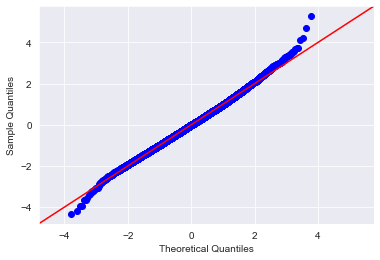

In [342]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


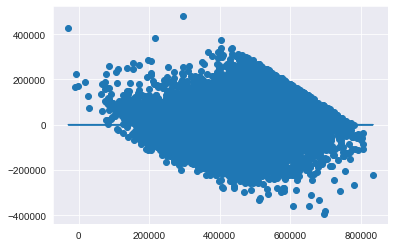

In [343]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [344]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [345]:
residuals = model.resid

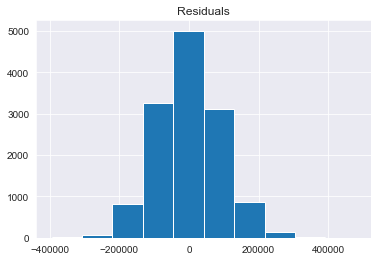

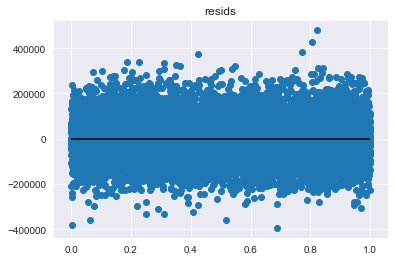

In [346]:
plot_residuals(residuals)

In [96]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [97]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [98]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6251553702143429, 0.6259078203675293, 0.6256399578395693)

In [99]:
cv5mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) )
cv10mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) )
cv20mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mse_scores,cv10mse_scores,cv20mse_scores

(-11468763951.890997, -11420071831.462048, -11400416200.820377)

In [100]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-84698.33344930485, -84547.16752166531, -84490.7745642015)

In [352]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [353]:
make_ols_sklearn(X, y)

train R2 score = 0.6417816835276549
test R2 score = 0.6436124946955284
cv5 R2 score = 0.6389592120215141
cv10 R2 score = 0.6358549924919048
cv5 MSE score = -8336745839.758519
cv10  MSE score = -8351442524.931444


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [354]:
make_ols_sklearn(X, y)

train R2 score = 0.642598157275565
test R2 score = 0.6408168595779588
cv5 R2 score = 0.6389592120215141
cv10 R2 score = 0.6358549924919048
cv5 MSE score = -8336745839.758519
cv10  MSE score = -8351442524.931444


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [355]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

In [356]:
resid['residuals']  = residuals

In [357]:
resid

,price,residuals
0,538000.0,59693.926497
1,180000.0,-46209.423206
2,604000.0,129334.822206
3,510000.0,29140.186405
5,291850.0,50004.741703
...,...,...
17201,475000.0,9558.474127
17202,360000.0,-101243.117714
17203,400000.0,-107881.226027
17204,402101.0,-60347.244864


In [358]:
import seaborn as sns

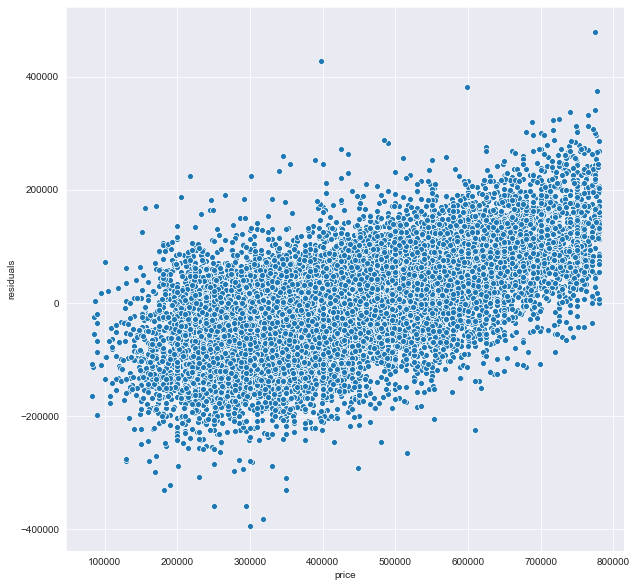

In [359]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)